<a href="https://colab.research.google.com/github/Kaustav9820/Kaustavs-codes/blob/main/stroke_dataset_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
 
uploaded = files.upload()
 
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv
User uploaded file "healthcare-dataset-stroke-data.csv" with length 316971 bytes


In [2]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
df=pd.read_csv(io.BytesIO(uploaded['healthcare-dataset-stroke-data.csv']))
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


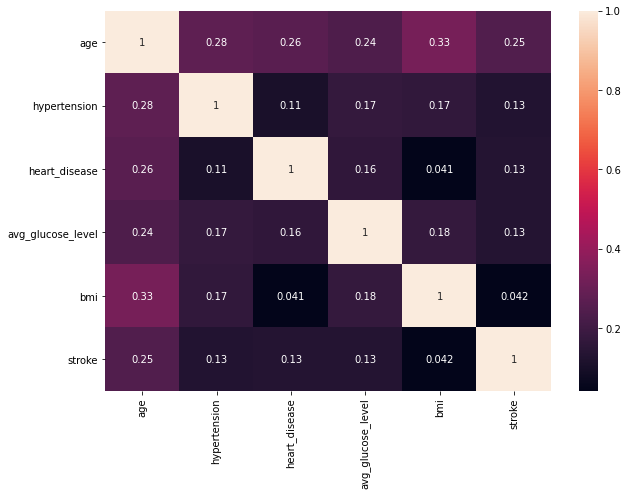

In [13]:
corr=df.corr()
plt.figure(figsize=(10,7))
sn.heatmap(corr,annot=True)

In [5]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [6]:
df.isnull().sum

<bound method DataFrame.sum of          id  gender    age  ...    bmi  smoking_status  stroke
0     False   False  False  ...  False           False   False
1     False   False  False  ...   True           False   False
2     False   False  False  ...  False           False   False
3     False   False  False  ...  False           False   False
4     False   False  False  ...  False           False   False
...     ...     ...    ...  ...    ...             ...     ...
5105  False   False  False  ...   True           False   False
5106  False   False  False  ...  False           False   False
5107  False   False  False  ...  False           False   False
5108  False   False  False  ...  False           False   False
5109  False   False  False  ...  False           False   False

[5110 rows x 12 columns]>

In [10]:
df=df.drop(['id','Residence_type'],axis=1)

In [16]:
df=pd.get_dummies(df,drop_first=True)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,0,0
1,61.0,0,0,202.21,NaN,1,0,0,1,0,0,1,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,NaN,0,0,0,1,0,1,0,0,0,1,0
5106,81.0,0,0,125.20,40.0,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,0,0,1,0,0,1,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,0,1,0,1,0,0,1,0,0


In [26]:
df.columns=['age','hypertension','heart_disease','avg_glucose_level','bmi','stroke','gender_Male','gender_Other','ever_Married_Yes','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes']

In [27]:
for i in range(df.shape[1]):
  df.iloc[:,i]=df.iloc[:,i].fillna(df.iloc[:,i].median())
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_Married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.301260,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,0.679023,0.203895,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,0.234512,0.254296,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0.0,0.0,0.536008,0.276060,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.963379,1.0,0.0,0.549349,0.156930,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,1.0,0.0,0.132167,0.203895,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5106,0.987793,0.0,0.0,0.323516,0.340206,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,0.426270,0.0,0.0,0.128658,0.232532,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5108,0.621582,0.0,0.0,0.513203,0.175258,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [156]:
from scipy import stats
import numpy as np
df_z=np.abs(stats.zscore(df))

In [159]:
df=df[(df<3).all(axis=1)]
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_Married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.0,1.0,0.801265,0.301260,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.743652,0.0,0.0,0.679023,0.203895,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.975586,0.0,1.0,0.234512,0.254296,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0.0,0.0,0.536008,0.276060,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.963379,1.0,0.0,0.549349,0.156930,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,1.0,0.0,0.132167,0.203895,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5106,0.987793,0.0,0.0,0.323516,0.340206,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,0.426270,0.0,0.0,0.128658,0.232532,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5108,0.621582,0.0,0.0,0.513203,0.175258,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [160]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_Married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [161]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression ()
from sklearn.model_selection import train_test_split

In [163]:
Y=df['stroke']
X=df.drop('stroke',axis=1)

In [168]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
lg.score(X_train,y_train)

0.9503424657534246

In [170]:
y_pred=lg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9559686888454012

In [171]:
 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
 
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier ()
tree.fit(X_train,y_train)
tree.score(X_train,y_train)

1.0

In [172]:
y_pred=tree.predict(X_test)
accuracy_score(y_pred,y_test)

0.9197651663405088

In [173]:
path=tree.cost_complexity_pruning_path(X_train,y_train)
ccp=path['ccp_alphas']
ccp

array([0.        , 0.00011917, 0.0001359 , 0.00013899, 0.00014269,
       0.00014949, 0.00015656, 0.00015764, 0.00015828, 0.00015945,
       0.00015968, 0.00016068, 0.00016152, 0.00016288, 0.00016308,
       0.00018052, 0.00018346, 0.00018346, 0.00018374, 0.00019569,
       0.00020385, 0.00020385, 0.00020385, 0.00020967, 0.00021404,
       0.00021744, 0.0002189 , 0.00021894, 0.00021946, 0.00021959,
       0.00022016, 0.00022505, 0.00022537, 0.0002258 , 0.00022703,
       0.00022882, 0.00023297, 0.00023443, 0.00023443, 0.00023763,
       0.00023782, 0.00023865, 0.00023879, 0.00023906, 0.00023906,
       0.00024263, 0.00024462, 0.00024935, 0.00025055, 0.00025668,
       0.00026093, 0.00026093, 0.00028377, 0.00028465, 0.00028539,
       0.00029121, 0.00029354, 0.00029354, 0.00029354, 0.00029354,
       0.00029354, 0.00031529, 0.00031766, 0.00032616, 0.00032616,
       0.00032616, 0.00032703, 0.00034247, 0.00034324, 0.00035305,
       0.00036523, 0.00036662, 0.00036693, 0.00036809, 0.00037

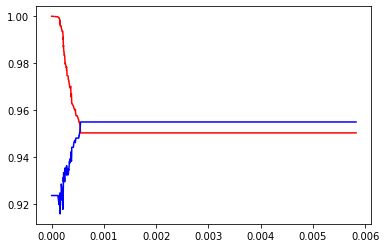

In [174]:
 
accuracy_train,accuracy_test=[],[]
for i in ccp:
  tree=DecisionTreeClassifier(ccp_alpha=i)
  tree.fit(X_train,y_train)
  y_pred=tree.predict(X_test)
  Y1=tree.predict(X_train)
  accuracy_train.append(accuracy_score(Y1,y_train))
  accuracy_test.append(accuracy_score(y_pred,y_test))
 
sn.lineplot(y=accuracy_train,x=ccp,color='red')
sn.lineplot(y=accuracy_test,x=ccp,color='blue')

In [175]:
tree1=DecisionTreeClassifier (ccp_alpha=0.001)
tree1.fit(X_train,y_train)
tree1.score(X_train,y_train)

0.9503424657534246

In [176]:
yp=tree1.predict(X_test)
accuracy_score(yp,y_test)

0.9549902152641878

In [178]:
 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
 
from sklearn.neighbors import KNeighborsClassifier
train=[]
for i in range(3,19):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  yp=knn.predict(X_test)
  train.append(accuracy_score(yp,y_test))
 
print(np.argmax(train)+3)
A=np.argmax(train)+3
knn1=KNeighborsClassifier(n_neighbors=A)
knn1.fit(X_train,y_train)
yp1=tree.predict(X_test)
accuracy_score(yp,y_test)

9


0.9598825831702544

In [182]:
 
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2)
 
from sklearn import svm
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)
yp2=clf.predict(X_test)
print(accuracy_score(yp2,y_test))

0.958904109589041


In [187]:
 
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)
 
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(X_train,y_train)
yp2=clf.predict(X_test)
accuracy_score(yp2,y_test)

0.9608610567514677